In [398]:
import pandas as pd

from datetime import datetime

In [399]:
#read in csvs

added_sprint_task_file = '/Users/cliffphillips/Downloads/sprint 4 mar 2025 release added - Sheet1.csv'

current_sprint_file = '/Users/cliffphillips/Downloads/2025-02-10T21_32_03.884Z E Visit - P E General - Release 2025 2 March Release - Sprint 4 1 23 2 12.csv'

df = pd.read_csv(added_sprint_task_file, header=None)

df

,0,1,2,3
0,IN DEVELOPMENT Current status: in development ...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!
1,ACCEPTANCE DEPLOY PENDING Current status: acce...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!
2,ACCEPTANCE DEPLOY PENDING Current status: acce...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!
3,CLOSED Current status: Closed MSH | Telestroke...,Jan 23 at 11:22 am,Task added,0 pts
4,PROD DEPLOY PENDING Current status: prod deplo...,Jan 23 at 1:39 pm,Task added,#ERROR!
...,...,...,...,...
220,DEVTEST QA VALIDATION Current status: devtest ...,Feb 10 at 8:27 am,Effort changed 2 → 3,#ERROR!
221,CLOSED Current status: Closed Support avatar h...,Feb 10 at 10:10 am,Effort changed 0 → 1,#ERROR!
222,IN DEVELOPMENT Current status: in development ...,Feb 10 at 1:23 pm,Task added,#ERROR!
223,DEVTEST QA VALIDATION Current status: devtest ...,Feb 10 at 1:23 pm,Task added,#ERROR!


In [400]:
# reformat columns

statuses = 'ready for development|in development|code review|rejected|devtest deploy pending|devtest qa validation|devtest product validation|devtest design validation|acceptance deploy pending|acceptance qa validation|beta deploy pending|beta qc validation|prod deploy pending|Closed'

df[['end_status','task_name']] = df[0].str.split('Current status:', expand=True)

df['task_name'] = df['task_name'].str.replace(statuses,'',regex=True).str.strip()

df.columns = ['string_name', 'string_date','string_action','points','end_status','task_name']

df[['date','time']] = df['string_date'].str.split('at ',expand=True)

df['date'] = df['date'].str.strip()

df['full_date'] = df['string_date'].str.replace('at ','').str.strip()

df['full_date'] = pd.to_datetime(df['full_date'], format='%b %d %I:%M %p')

current_year = datetime.now().year

df['full_date'] = df['full_date'].apply(lambda x: x.replace(year=current_year))

df['day_date'] = df['full_date'].dt.strftime('%m-%d-%Y')

df




,string_name,string_date,string_action,points,end_status,task_name,date,time,full_date,day_date
0,IN DEVELOPMENT Current status: in development ...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!,IN DEVELOPMENT,[eVault Migration] BUG - See Now Intake questi...,Jan 23,10:51 am,2025-01-23 10:51:00,01-23-2025
1,ACCEPTANCE DEPLOY PENDING Current status: acce...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!,ACCEPTANCE DEPLOY PENDING,[eVault Migration] BUG - Attendees are unable ...,Jan 23,10:51 am,2025-01-23 10:51:00,01-23-2025
2,ACCEPTANCE DEPLOY PENDING Current status: acce...,Jan 23 at 10:51 am,Effort changed 0 → 1.5,#ERROR!,ACCEPTANCE DEPLOY PENDING,[eVault Migration] BUG - Chat does not work,Jan 23,10:51 am,2025-01-23 10:51:00,01-23-2025
3,CLOSED Current status: Closed MSH | Telestroke...,Jan 23 at 11:22 am,Task added,0 pts,CLOSED,MSH | Telestroke: Add'l SSO Production Users 0...,Jan 23,11:22 am,2025-01-23 11:22:00,01-23-2025
4,PROD DEPLOY PENDING Current status: prod deplo...,Jan 23 at 1:39 pm,Task added,#ERROR!,PROD DEPLOY PENDING,[CDX] Create a Base:Api::EvisitCore::CdxIngest...,Jan 23,1:39 pm,2025-01-23 13:39:00,01-23-2025
...,...,...,...,...,...,...,...,...,...,...
220,DEVTEST QA VALIDATION Current status: devtest ...,Feb 10 at 8:27 am,Effort changed 2 → 3,#ERROR!,DEVTEST QA VALIDATION,Synchronizing Page Visibility with Default Vie...,Feb 10,8:27 am,2025-02-10 08:27:00,02-10-2025
221,CLOSED Current status: Closed Support avatar h...,Feb 10 at 10:10 am,Effort changed 0 → 1,#ERROR!,CLOSED,Support avatar hot fix Jan 24,Feb 10,10:10 am,2025-02-10 10:10:00,02-10-2025
222,IN DEVELOPMENT Current status: in development ...,Feb 10 at 1:23 pm,Task added,#ERROR!,IN DEVELOPMENT,4.4 Deleting Data Fields,Feb 10,1:23 pm,2025-02-10 13:23:00,02-10-2025
223,DEVTEST QA VALIDATION Current status: devtest ...,Feb 10 at 1:23 pm,Task added,#ERROR!,DEVTEST QA VALIDATION,Synchronizing Page Visibility with Default Vie...,Feb 10,1:23 pm,2025-02-10 13:23:00,02-10-2025


In [401]:
df['action'] = df['string_action'].str.replace('\d','',regex=True)

df['action'] = df['action'].str.replace('→','',regex=True)

df['action'] = df['action'].str.replace(".",'',regex=True).str.strip()

In [402]:
#df['points_changed'] = 

df[['a_1','a_2','original_points','char','new_points']] = df['string_action'].str.split(' ', expand=True)

#df.drop(columns=['string_name','string_date','string_action','a_1','a_2','char'])

sprint_worked_added = df[['task_name','action','full_date','day_date','date','time','end_status','original_points','new_points']]

#df['points_changed'].str.replace('0','',regex=True)
sprint_worked_added


,task_name,action,full_date,day_date,date,time,end_status,original_points,new_points
0,[eVault Migration] BUG - See Now Intake questi...,Effort changed,2025-01-23 10:51:00,01-23-2025,Jan 23,10:51 am,IN DEVELOPMENT,0,1.5
1,[eVault Migration] BUG - Attendees are unable ...,Effort changed,2025-01-23 10:51:00,01-23-2025,Jan 23,10:51 am,ACCEPTANCE DEPLOY PENDING,0,1.5
2,[eVault Migration] BUG - Chat does not work,Effort changed,2025-01-23 10:51:00,01-23-2025,Jan 23,10:51 am,ACCEPTANCE DEPLOY PENDING,0,1.5
3,MSH | Telestroke: Add'l SSO Production Users 0...,Task added,2025-01-23 11:22:00,01-23-2025,Jan 23,11:22 am,CLOSED,None,None
4,[CDX] Create a Base:Api::EvisitCore::CdxIngest...,Task added,2025-01-23 13:39:00,01-23-2025,Jan 23,1:39 pm,PROD DEPLOY PENDING,None,None
...,...,...,...,...,...,...,...,...,...
220,Synchronizing Page Visibility with Default Vie...,Effort changed,2025-02-10 08:27:00,02-10-2025,Feb 10,8:27 am,DEVTEST QA VALIDATION,2,3
221,Support avatar hot fix Jan 24,Effort changed,2025-02-10 10:10:00,02-10-2025,Feb 10,10:10 am,CLOSED,0,1
222,4.4 Deleting Data Fields,Task added,2025-02-10 13:23:00,02-10-2025,Feb 10,1:23 pm,IN DEVELOPMENT,None,None
223,Synchronizing Page Visibility with Default Vie...,Task added,2025-02-10 13:23:00,02-10-2025,Feb 10,1:23 pm,DEVTEST QA VALIDATION,None,None


In [403]:

current_sprint_file = pd.read_csv(current_sprint_file)

current_sprint_file = current_sprint_file[['Task ID', 'Task Name', 'Team (drop down)','Epic (drop down)']]

tasks_added = pd.merge(sprint_worked_added, current_sprint_file, left_on = 'task_name', right_on = 'Task Name')

tasks_added = tasks_added[['Task ID','Task Name','Team (drop down)','Epic (drop down)','end_status','full_date','day_date','date','time','action','original_points','new_points']]


tasks_added

,Task ID,Task Name,Team (drop down),Epic (drop down),end_status,full_date,day_date,date,time,action,original_points,new_points
0,86b2dj04p,[eVault Migration] BUG - Attendees are unable ...,Kernel,NaN,ACCEPTANCE DEPLOY PENDING,2025-01-23 10:51:00,01-23-2025,Jan 23,10:51 am,Effort changed,0,1.5
1,86b2eqbtu,[eVault Migration] BUG - Chat does not work,Kernel,NaN,ACCEPTANCE DEPLOY PENDING,2025-01-23 10:51:00,01-23-2025,Jan 23,10:51 am,Effort changed,0,1.5
2,86b3cz041,MSH | Telestroke: Add'l SSO Production Users 0...,NaN,NaN,CLOSED,2025-01-23 11:22:00,01-23-2025,Jan 23,11:22 am,Task added,None,None
3,86b3n0ewj,[CDX] Create a Base:Api::EvisitCore::CdxIngest...,Kernel,NaN,PROD DEPLOY PENDING,2025-01-23 13:39:00,01-23-2025,Jan 23,1:39 pm,Task added,None,None
4,86b3n273w,Arbitrary Phone Numbers | DB migrations and ne...,Pixels,Call participant using arbitrary phone number,IN DEVELOPMENT,2025-01-23 15:05:00,01-23-2025,Jan 23,3:05 pm,Task added,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
154,86b3vkqmq,[Telephony Inbound] Fix CDX reg test after cdx...,Kernel,Telephony - Visit type front door to Queue - D...,CLOSED,2025-02-07 12:26:00,02-07-2025,Feb 7,12:26 pm,Task added,None,None
155,86b3pv16c,Expand field character limits,Canvas,"Forms - View, edit, submit throughout the product",IN DEVELOPMENT,2025-02-10 06:58:00,02-10-2025,Feb 10,6:58 am,Task added,None,None
156,86b3w66ec,CVE-2024-52798 - path-to-regex - PDF generator...,UPMCE,NaN,READY FOR DEVELOPMENT,2025-02-10 08:00:00,02-10-2025,Feb 10,8:00 am,Task added,None,None
157,86b3w66tn,cookie - PDF generator vulnerability,UPMCE,NaN,READY FOR DEVELOPMENT,2025-02-10 08:00:00,02-10-2025,Feb 10,8:00 am,Task added,None,None


In [404]:

tasks_added = tasks_added[tasks_added['action'] == 'Task added']

tasks_added_team = tasks_added.groupby('Team (drop down)')['Task ID'].count().reset_index()

tasks_added_team.sort_values(by='Task ID', ascending=False)

,Team (drop down),Task ID
2,Kernel,52
0,Canvas,23
5,UPMCE,13
3,Pixels,8
1,Integrations,1
4,Shield Team,1


In [405]:
tasks_added_team_date = tasks_added.groupby(['day_date','Team (drop down)'])['Task ID'].count().reset_index()

tasks_added_team_date = tasks_added_team_date.sort_values(by='day_date')

tasks_added_team_date = tasks_added_team_date.set_index(['day_date','Team (drop down)'])

tasks_added_team_date

Task ID
day_date   Team (drop down)         
01-23-2025 Kernel                  3
           Pixels                  1
01-24-2025 Canvas                  1
           Kernel                  1
           Pixels                  1
           UPMCE                   1
01-27-2025 UPMCE                   2
           Pixels                  4
           Canvas                  6
           Kernel                  7
01-28-2025 Kernel                  2
           UPMCE                   1
01-29-2025 UPMCE                   1
           Canvas                  3
           Integrations            1
           Kernel                  8
01-30-2025 UPMCE                   2
           Pixels                  1
           Canvas                  4
           Kernel                  3
01-31-2025 Kernel                  2
           UPMCE                   1
02-03-2025 Canvas                  2
           Kernel                  3
02-04-2025 UPMCE                   2
           Canvas                  1
           Kernel                  5
02-05-2025 Shield Team             1
           Kernel                  6
02-06-2025 Canvas                  1
           Kernel                  5
02-07-2025 Canvas                  4
           Kernel                  5
           UPMCE                   1
02-10-2025 Kernel                  2
           Pixels                  1
           Canvas                  1
           UPMCE                   2

/var/folders/rs/jl4yyqz56zj2hk5knqlr1qj40000gn/T/ipykernel_14217/1977765963.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(tasks_added_team_date, x= 'day_date', y = 'Task ID', ci=None)


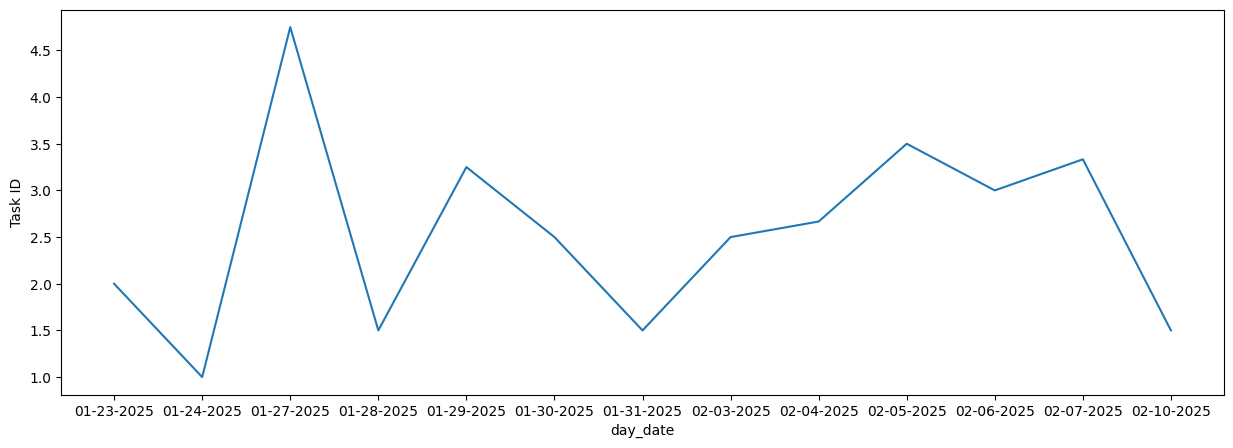

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


tasks_added_team_date = tasks_added.groupby(['day_date','Team (drop down)'])['Task ID'].count().reset_index()

tasks_added_team_date = tasks_added_team_date.sort_values(by='day_date')

tasks_added_team_date = tasks_added_team_date.set_index(['day_date','Team (drop down)'])

plt.figure(figsize=(15,5))


sns.lineplot(tasks_added_team_date, x= 'day_date', y = 'Task ID', ci=None)

plt.show()


In [407]:
tasks_added_date = tasks_added.groupby('day_date')['Task ID'].count().reset_index()
tasks_added_date.sort_values(by='day_date', ascending=False)

,day_date,Task ID
12,02-10-2025,6
11,02-07-2025,10
10,02-06-2025,6
9,02-05-2025,7
8,02-04-2025,8
7,02-03-2025,6
6,01-31-2025,3
5,01-30-2025,10
4,01-29-2025,13
3,01-28-2025,3
